In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from astropy.table import Table

In [3]:
!ls /Users/Trevor1/Desktop/data/files/catalogs/

DR14Q_v4_4.fits
DR16Q_v4.fits
DR16Q_v4.short.csv.wrelgi
Rankine20_CIV_HeII.fits
Rankine20_CIV_HeII_wDelGI.fits
Rankine20_CIV_HeII_wDelGI_wCIVDist.csv
Rankine20_CIV_HeII_wDelGI_wCIVDist_4Latent_Jul0621.fits
dr14_4latentparams.csv
dr7_bh_May09_2011.fits


In [4]:
dat = pd.read_csv("/Users/Trevor1/Desktop/data/files/catalogs/Rankine20_CIV_HeII_wDelGI_wCIVDist.csv")
dat.head()

,Unnamed: 0,SDSS_NAME,RA,Dec,z_paul,good,nBAL,AIi,BIi,CIV_blue,...,LUM_0.2_12.0keV,FUV,FUV_IVAR,NUV,NUV_IVAR,FIRST_FLUX,FIRST_SNR,Delta_G_I,Separation,CIV_Distance
0,0,b'003708.46+002855.8',9.285266,0.482174,3.02295,True,False,False,True,691.966469,...,NaN,0.032006,45.552314,-0.018692,3.531072,-1.0,-1.0,0.600,0.000000e+00,0.373444
1,1,b'004959.24+001903.1',12.496858,0.317540,3.32150,True,False,False,True,857.180965,...,NaN,-0.079175,12.024832,-0.040529,3.323599,-1.0,-1.0,0.375,1.144982e-11,0.618225
2,2,b'015017.70+002902.4',27.573786,0.484025,3.00333,True,False,False,True,1474.865400,...,NaN,-0.068240,1074.827534,0.183702,373.859257,-1.0,-1.0,0.167,2.289918e-11,0.681618
3,3,b'023238.49-001936.2',38.160390,-0.326749,3.34348,True,False,False,True,715.316626,...,NaN,-0.042674,229.386872,0.313899,1.875008,-1.0,-1.0,0.831,0.000000e+00,0.563721
4,4,b'072047.82+405455.5',110.199280,40.915418,3.04179,True,False,False,True,195.093283,...,NaN,-0.394990,7.126986,0.070899,32.722264,-1.0,-1.0,-0.159,0.000000e+00,0.282193


In [42]:
z = dat[["z_paul"]].values.flatten()

#cut df to redshift range we're working with
dat = dat[(z>1.62)&(z<2.08)]
dat.shape

(45441, 63)

In [43]:
dat.columns

Index(['Unnamed: 0', 'SDSS_NAME', 'RA', 'Dec', 'z_paul', 'good', 'nBAL', 'AIi',
       'BIi', 'CIV_blue', 'CIV_EW', 'HeII_EW', 'THING_ID', 'PLATE', 'MJD',
       'FIBERID', 'SPECTRO', 'Z', 'Z_ERR', 'SOURCE_Z', 'Z_VI', 'Z_PIPE',
       'Z_PIPE_ERR', 'ZWARNING', 'Z_PCA', 'Z_PCA_ER', 'Z_MGII', 'BOSS_TARGET1',
       'ANCILLARY_TARGET1', 'ANCILLARY_TARGET2', 'EBOSS_TARGET0',
       'EBOSS_TARGET1', 'EBOSS_TARGET2', 'N_SPEC_SDSS', 'N_SPEC_BOSS',
       'N_SPEC', 'BI_CIV', 'ERR_BI_CIV', 'RUN_NUMBER', 'RERUN_NUMBER',
       'COL_NUMBER', 'FIELD_NUMBER', 'OBJ_ID', 'MI', 'RASS_COUNTS',
       'RASS_COUNTS_SNR', 'SDSS2ROSAT_SEP', 'FLUX_0.2_2.0keV',
       'FLUX_0.2_2.0keV_ERR', 'FLUX_2.0_12.0keV', 'FLUX_2.0_12.0keV_ERR',
       'FLUX_0.2_12.0keV', 'FLUX_0.2_12.0keV_ERR', 'LUM_0.2_12.0keV', 'FUV',
       'FUV_IVAR', 'NUV', 'NUV_IVAR', 'FIRST_FLUX', 'FIRST_SNR', 'Delta_G_I',
       'Separation', 'CIV_Distance'],
      dtype='object')

In [44]:
ew = dat[["CIV_EW"]].values.flatten()
logEW = np.log10(ew)
blue = dat[["CIV_blue"]].values.flatten()
CIVdist = dat[["CIV_Distance"]].values.flatten()
HeII_ew = dat[["HeII_EW"]].values.flatten()
good = dat[["good"]].values.flatten()

<ipython-input-44-c01b0fe855ac>:2: RuntimeWarning: invalid value encountered in log10
  logEW = np.log10(ew)


<ipython-input-45-0c7bfb0b0d05>:3: RuntimeWarning: divide by zero encountered in log10
  ax2.scatter(blue[good], logEW[good], c=np.log10(HeII_ew[good]))
<ipython-input-45-0c7bfb0b0d05>:3: RuntimeWarning: invalid value encountered in log10
  ax2.scatter(blue[good], logEW[good], c=np.log10(HeII_ew[good]))


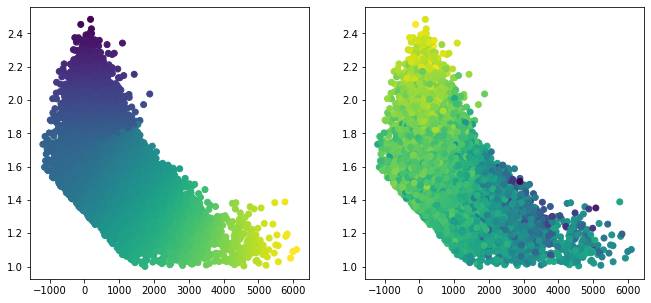

In [45]:
fig, [ax1,ax2] = plt.subplots(1, 2, figsize=(11,5))
ax1.scatter(blue[good], logEW[good], c=CIVdist[good])
ax2.scatter(blue[good], logEW[good], c=np.log10(HeII_ew[good]))
plt.show()

Want a good training set for the autoencoder, which I think can be retrieved by taking equal-sized bins in CIV distance -- that should track changes in the spectra well.

In [46]:
CIVdist.min(), CIVdist.max()

(-99.0, 1.3578617879098829)

In [47]:
(CIVdist==-99).sum()

7

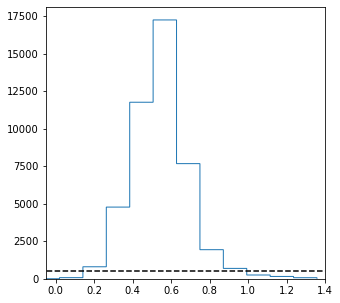

In [48]:
fig = plt.figure(figsize=(5,5))
plt.hist(CIVdist, histtype="step", bins="scott")
plt.plot([-100,100], [500,500], "--k")
plt.xlim(-0.05,1.4)
plt.show()

In [95]:
(CIVdist<0.4).sum(), ((CIVdist>=0.4)&(CIVdist<0.5)).sum(), ((CIVdist>=0.5)&(CIVdist<0.6)).sum(), ((CIVdist>=0.6)&(CIVdist<0.7)).sum(), (CIVdist>=0.69).sum() 

(6836, 9627, 14920, 8988, 5577)

Take 4000 from each bin for the training set.  Thery're not evenly spaced, but will hopefully still do better than just randomly drawing from the entire CIV space.

Int64Index([     8,     15,     24,     48,     62,     65,     66,     69,
                92,    103,
            ...
            145935, 145936, 145937, 145938, 145939, 145940, 145941, 145942,
            145944, 145945],
           dtype='int64', length=45441)

In [71]:
dat.loc[dat.index]

,Unnamed: 0,SDSS_NAME,RA,Dec,z_paul,good,nBAL,AIi,BIi,CIV_blue,...,LUM_0.2_12.0keV,FUV,FUV_IVAR,NUV,NUV_IVAR,FIRST_FLUX,FIRST_SNR,Delta_G_I,Separation,CIV_Distance
8,8,b'074717.69+483917.4',116.823739,48.654850,1.88349,True,False,False,True,1255.186285,...,NaN,0.091723,20.541693,0.221892,269.526076,-1.00,-1.000000,0.057,2.289999e-11,0.634468
15,15,b'074508.36+432018.7',116.284848,43.338546,2.04867,False,False,False,True,1035.547028,...,NaN,0.299364,196.506041,0.104414,191.143006,-1.00,-1.000000,0.986,7.044756e-11,0.274755
24,24,b'081318.91+463353.1',123.328802,46.564770,1.98150,True,False,False,True,327.167286,...,NaN,-0.243693,144.650715,0.209737,15.758822,-1.00,-1.000000,-0.006,2.289999e-11,0.436304
48,48,b'093512.48-021501.9',143.802005,-2.250530,1.96095,True,False,False,True,1019.521232,...,NaN,-0.152725,33.907194,0.453422,10.802852,-1.00,-1.000000,-0.103,9.154051e-11,0.620002
62,62,b'090847.10-021645.5',137.196263,-2.279331,1.96067,False,False,False,True,3141.712465,...,NaN,0.030075,1585.328237,0.061559,3114.210494,1.11,6.109413,1.044,0.000000e+00,0.981641
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145940,145940,b'122158.26+313141.1',185.492769,31.528089,1.88189,True,True,False,False,781.411297,...,NaN,2.220843,2.531889,3.473794,3.662243,-1.00,-1.000000,-0.027,0.000000e+00,0.600844
145941,145941,b'104516.86+374948.2',161.320277,37.830078,1.96896,True,True,False,False,317.900832,...,NaN,0.000000,0.000000,0.000000,0.000000,-1.00,-1.000000,-0.070,0.000000e+00,0.541151
145942,145942,b'104517.00+390453.4',161.320854,39.081517,1.71788,True,True,False,False,-811.789916,...,NaN,1.190250,3.502668,1.778391,4.308532,-1.00,-1.000000,-0.015,0.000000e+00,0.271323
145944,145944,b'104158.47+370704.0',160.493650,37.117798,1.90771,True,True,False,False,1953.232349,...,NaN,0.378174,3.417499,11.674971,1.187238,-1.00,-1.000000,-0.131,0.000000e+00,0.778887


In [79]:
dat["CIV_Distance"].loc[dat.index].values

array([[0.63446844],
       [0.27475522],
       [0.43630353],
       ...,
       [0.27132257],
       [0.77888739],
       [0.94303795]])

In [96]:
#Save indices of spectra we want to train on
train_inds = []
valid_inds = []

#Create evenly sized bins
bins = [0, 0.4, 0.5, 0.6, 0.69, max(CIVdist)+0.1]

for i in range(len(bins)-1):
    mask = (CIVdist>=bins[i]) & (CIVdist<bins[i+1])
    inds_list = dat.index[mask]
    train_inds.append(inds_list[:4000]) #take 3000 from each bin for training
    valid_inds.append(inds_list[4000:5500]) #take 1500 from each bin for validation

train_inds = np.array(train_inds)
valid_inds = np.array(valid_inds)

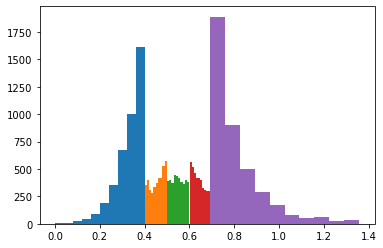

In [97]:
for i in range(train_inds.shape[0]):
    _ = plt.hist(dat["CIV_Distance"].loc[train_inds[i,:]])
plt.show()

In [98]:
df_train = dat.loc[train_inds.flatten()]
df_train.shape

(20000, 63)

In [99]:
df_valid = dat.loc[valid_inds.flatten()]
df_valid.shape

(7500, 63)

In [100]:
!ls /Users/Trevor1/Desktop/data/files/catalogs/

DR14Q_v4_4.fits
DR16Q_v4.fits
DR16Q_v4.short.csv.wrelgi
Rankine20_CIV_HeII.fits
Rankine20_CIV_HeII_wDelGI.fits
Rankine20_CIV_HeII_wDelGI_wCIVDist.csv
Rankine20_CIV_HeII_wDelGI_wCIVDist_4Latent_Jul0621.fits
dr14_4latentparams.csv
dr14_train_uniform.csv
dr7_bh_May09_2011.fits


In [101]:
df_train.to_csv("/Users/Trevor1/Desktop/data/files/catalogs/dr14_train_uniform.csv")
df_valid.to_csv("/Users/Trevor1/Desktop/data/files/catalogs/dr14_valid_uniform.csv")